In [1]:
#Reading Excel File
import pandas as pd
a=pd.read_csv("HRDatasets.csv")
print(a)

                Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0         Adinolfi, Wilson  K  10026          0                0         1   
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
3                Alagbe,Trina  10088          1                1         0   
4            Anderson, Carol   10069          0                2         0   
..                        ...    ...        ...              ...       ...   
306            Woodson, Jason  10135          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   
308          Zamora, Jennifer  10010          0                0         0   
309               Zhou, Julia  10043          0                0         0   
310             Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  

In [2]:
#Basic Panda Queries
print(a.head())
print(a.tail())
print(a.info())
print(a.isnull().sum())

              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

          Department     ManagerName ManagerID RecruitmentSource  \
0  Production     

In [3]:
#Changing Date Formats To DD/MM/YYYY
a['Salary'] = a['Salary'].astype(float)
a['DateofHire'] = pd.to_datetime(a['DateofHire'], format='%d-%m-%Y') 
a['DOB'] = pd.to_datetime(a['DOB'], format='%d-%m-%Y')
a['DateofTermination '] = pd.to_datetime(a['DateofTermination'], format='%d-%m-%Y')
a['LastPerformanceReview_Date'] =pd.to_datetime(a['LastPerformanceReview_Date'], format='%d-%m-%Y') 

In [4]:
#Calculating Basic Stats of Numerical Data
print(a.describe())

              EmpID   MarriedID  MaritalStatusID    GenderID  EmpStatusID  \
count    311.000000  311.000000       311.000000  311.000000   311.000000   
mean   10156.000000    0.398714         0.810289    0.434084     2.392283   
min    10001.000000    0.000000         0.000000    0.000000     1.000000   
25%    10078.500000    0.000000         0.000000    0.000000     1.000000   
50%    10156.000000    0.000000         1.000000    0.000000     1.000000   
75%    10233.500000    1.000000         1.000000    1.000000     5.000000   
max    10311.000000    1.000000         4.000000    1.000000     5.000000   
std       89.922189    0.490423         0.943239    0.496435     1.794383   

           DeptID  PerfScoreID  FromDiversityJobFairID         Salary  \
count  311.000000   311.000000              311.000000     311.000000   
mean     4.610932     2.977492                0.093248   69020.684887   
min      1.000000     1.000000                0.000000   45046.000000   
25%      5.000

In [5]:
# Counting Values of Categorical Data
print("Marital Data")
 print(a['MaritalDesc'].value_counts())
 print("\nDepartment Data")
 print(a['Department'].value_counts())
 print("\nPosition Data")
 print(a['Position'].value_counts())
 print("\nManager Data")
 print(a['ManagerName'].value_counts())

Marital Data
MaritalDesc
Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: count, dtype: int64

Department Data
Department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64

Position Data
Position
Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Sr. Network Engineer              5
Database Administrator            5
Network Engineer                  5
BI Developer                      4
Senior BI Developer               3
Administrative Assistant          3
Sales Manager                     3
Accountant I                      3
Sr. DBA                           2
IT Manager - DB                   2
Sr. Ac

In [6]:
# Calculating Total Employees
#calculate total employees
 total_employees = len(a)
 print(f'Total Employees: {total_employees}') 

Total Employees: 311


In [7]:
#Filling Misssing Values
# Fill missing values (NaT) with 'CurrentlyWorking'
a['DateofTermination'] = a['DateofTermination'].fillna(value='CurrentlyWorking')
 # Print only the 'DateofTermination ' column
 print(a['DateofTermination ']) 

0            NaT
1     2016-06-16
2     2012-09-24
3            NaT
4     2016-06-09
         ...    
306          NaT
307   2015-09-29
308          NaT
309          NaT
310          NaT
Name: DateofTermination , Length: 311, dtype: datetime64[ns]


In [8]:
#Total Old Employees
# Count the number of employees who have left
 employees_left_count = (a['DateofTermination'] != 'CurrentlyWorking').sum()
 print(f"Number of employees who have left: {employees_left_count}") 

Number of employees who have left: 104


In [9]:
# Total Current Employees
# Count the number of employees currently working
 currently_working_count = (a['DateofTermination'] == 'CurrentlyWorking').sum()
 print(f"Number of employees currently working: {currently_working_count}") 

Number of employees currently working: 207


In [10]:
# Total Departments
#calculate total departments
total_departments = a['Department'].nunique()
print(f'Total Departments: {total_departments}') 

Total Departments: 6


In [11]:
# Avg Salary
#calculate average salary
average_salary = a['Salary'].mean()
print(f'Average Salary: Rs.{average_salary:.2f}') 

Average Salary: Rs.69020.68


In [12]:
# Avg Years With Company
#calculating avg age of employee
import datetime as dt
 # Calculate age of each employee
a['Age'] = (dt.datetime.now() - a['DOB']). dt.days / 365.25
average_age = a['Age'].mean()
print(f'Average Age: {average_age:.2f}') 

Average Age: 45.58


In [13]:
#Calculate average years with company
from datetime import datetime
 # Calculate Years with Company from 'DateofHire'
a['YearsWithCompany'] = (datetime.now() - a['DateofHire']).dt.days / 365.25

 # Calculate Average Years with Company
average_years_with_company = a['YearsWithCompany'].mean()

 # Print the result
print(f'Average Years with Company: {average_years_with_company:.2f}') 

Average Years with Company: 11.95


In [14]:
# Avg Age Of Employee
#calculate total number of employees who have left
total_attrition = len(a[a['DateofTermination'].notna()])
print(f'Total Attrition: {total_attrition}') 

Total Attrition: 311


In [15]:
# Attrition Rate
#Calculate the attrition rate
attrition_rate = (total_attrition / total_employees) * 100
print(f'Attrition Rate: {attrition_rate:.2f}%') 

Attrition Rate: 100.00%


<Axes: xlabel='Department'>

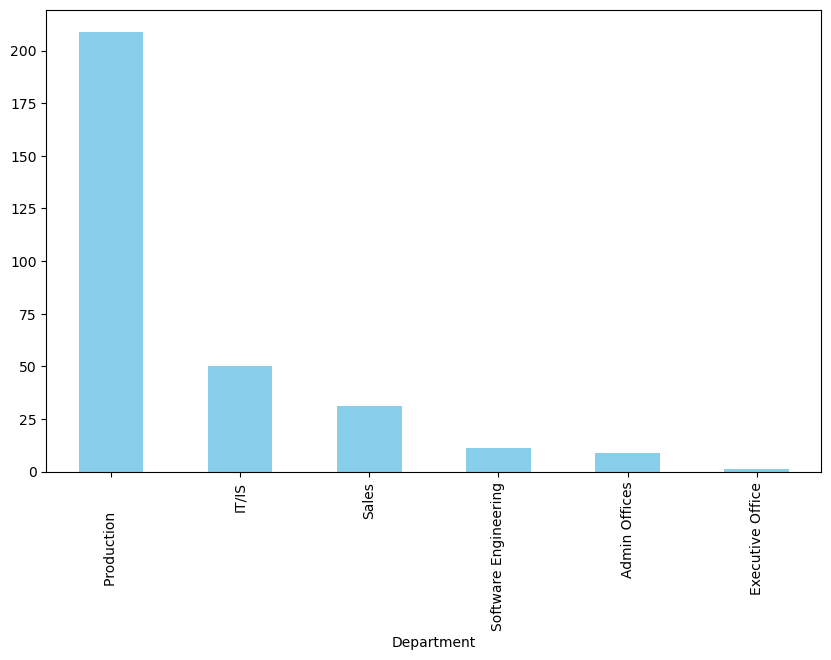

In [16]:
# Making Graph Of Total Employees Per Department
#graph to showcase count of employees in each department
import matplotlib.pyplot as plt
 # Group by 'Department' and count the number of employees in each department
department_counts = a['Department'].value_counts()
 # Plotting
plt.figure(figsize=(10, 6))
department_counts.plot(kind='bar', color='skyblue')

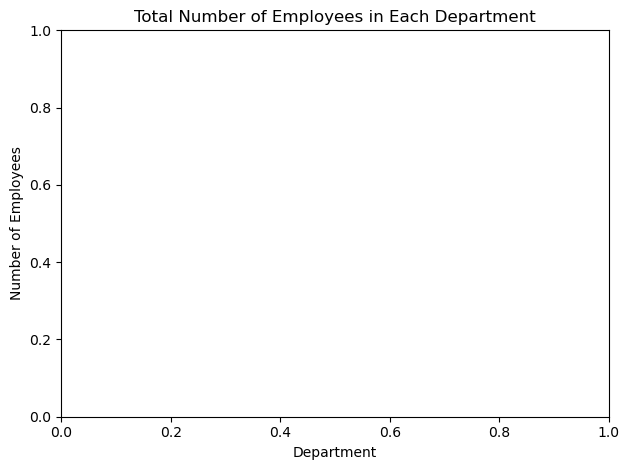

In [17]:
# Adding titles and labels
plt.title('Total Number of Employees in Each Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
 # Display the plot
plt.tight_layout()
plt.show()

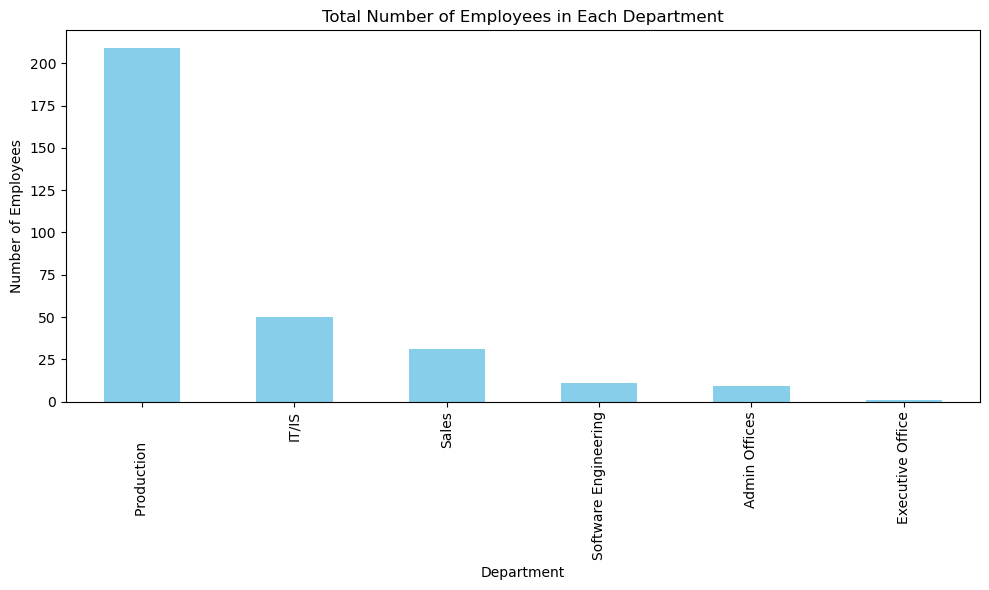

In [18]:
# Continued...
#graph to showcase count of employees in each department
import matplotlib.pyplot as plt
 # Group by 'Department' and count the number of employees in each department
department_counts = a['Department'].value_counts()
 # Plotting
plt.figure(figsize=(10, 6))
department_counts.plot(kind='bar', color='skyblue')
# Adding titles and labels
plt.title('Total Number of Employees in Each Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
 # Display the plot
plt.tight_layout()
plt.show()

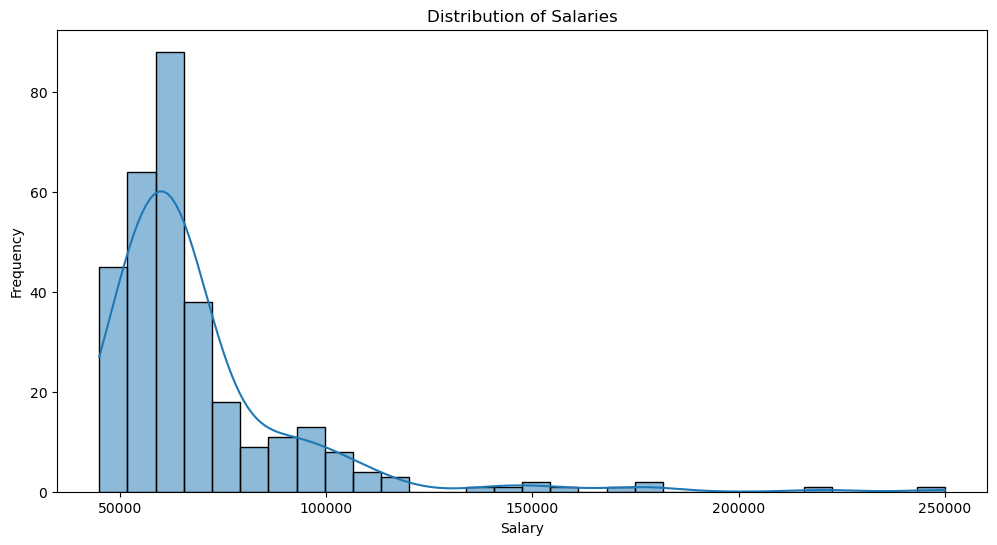

In [19]:
# DISTRIBUTION OF SALARY
import matplotlib.pyplot as plt
import seaborn as sns
 # Histogram of salaries
plt.figure(figsize=(12, 6))
sns.histplot(a['Salary'], bins=30, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

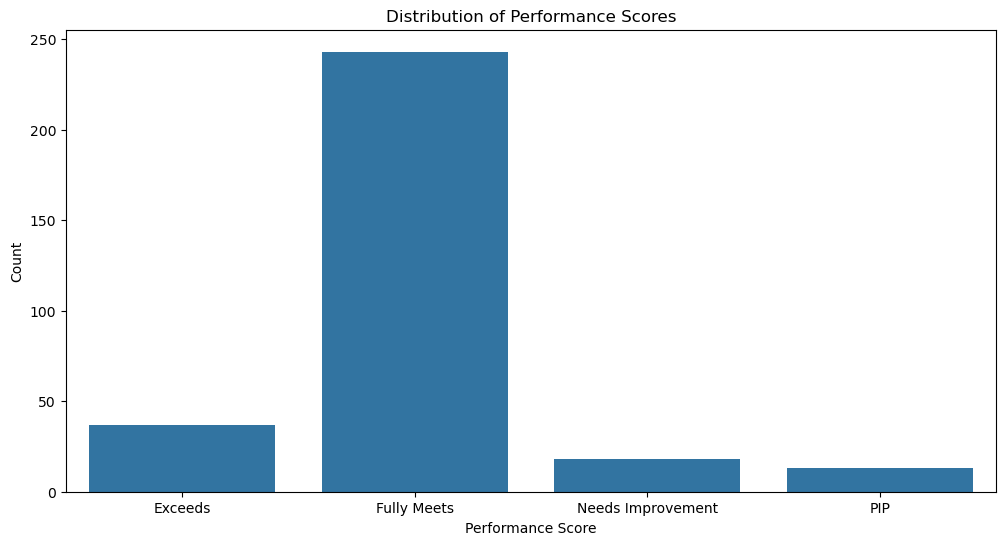

In [20]:
# Performance Scorce Distrubution
plt.figure(figsize=(12, 6))
sns.countplot(data=a, x='PerformanceScore')
plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.show()

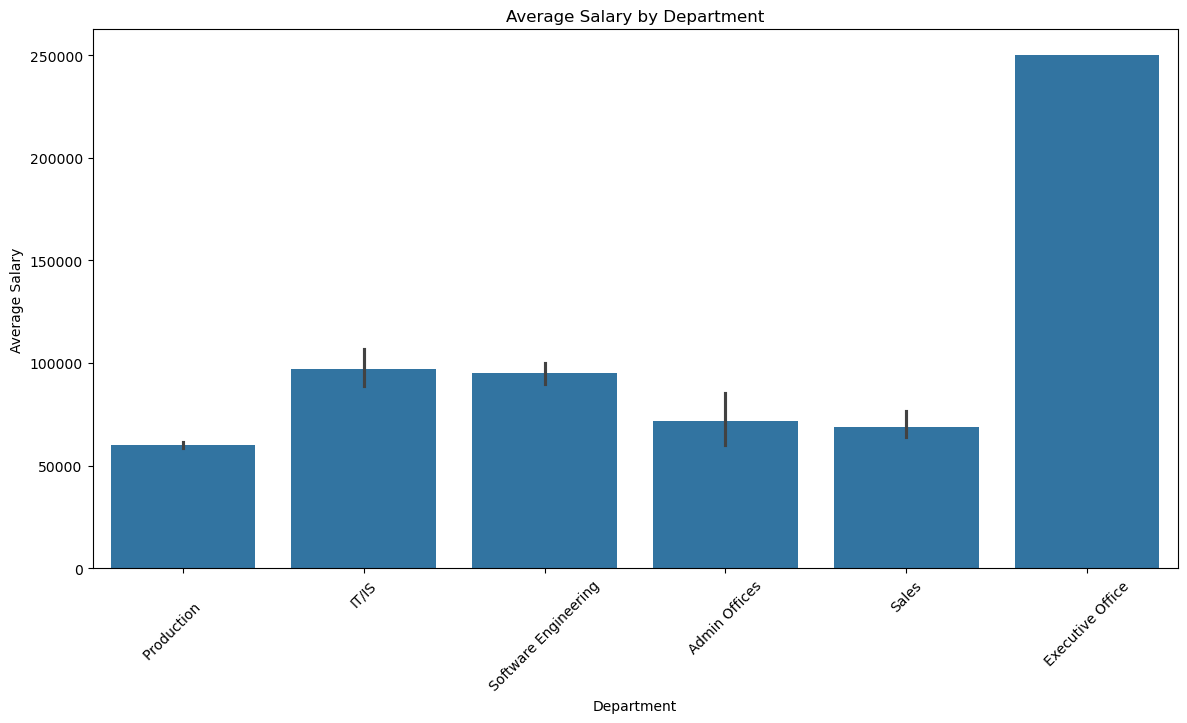

In [21]:
# Average Salary By Department
plt.figure(figsize=(14, 7))
sns.barplot(data=a, x='Department', y='Salary', estimator='mean')
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

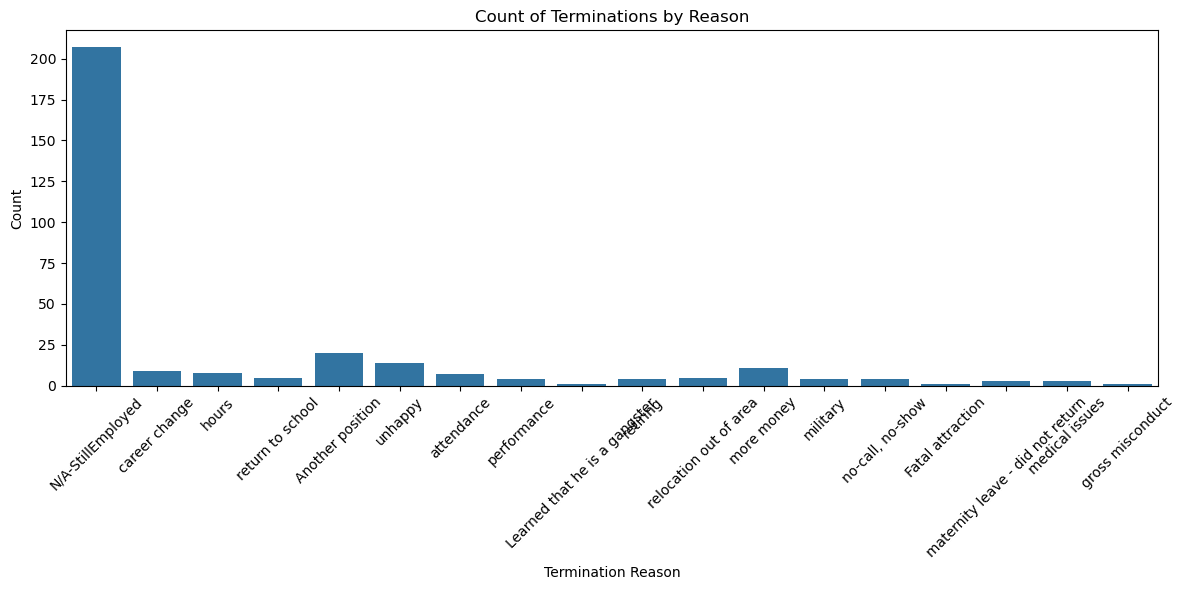

In [22]:
# Terminations By Reason
plt.figure(figsize=(12, 6))
sns.countplot(data=a, x='TermReason')
plt.title('Count of Terminations by Reason')
plt.xlabel('Termination Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

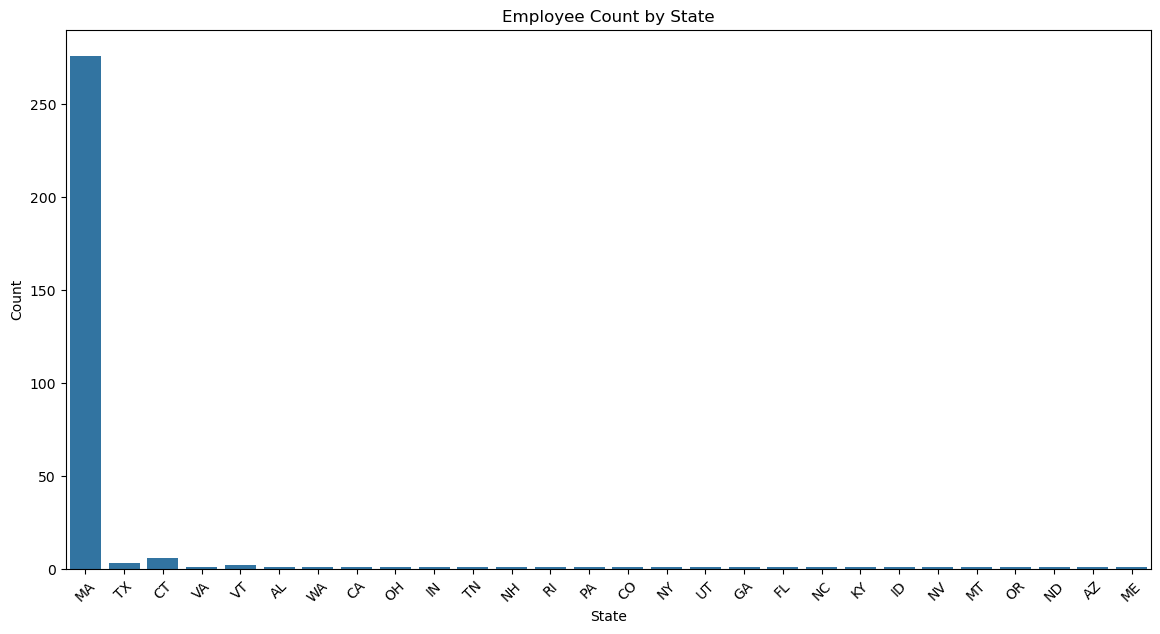

In [23]:
# Employee Count By State
plt.figure(figsize=(14, 7))
sns.countplot(data=a, x='State')
plt.title('Employee Count by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

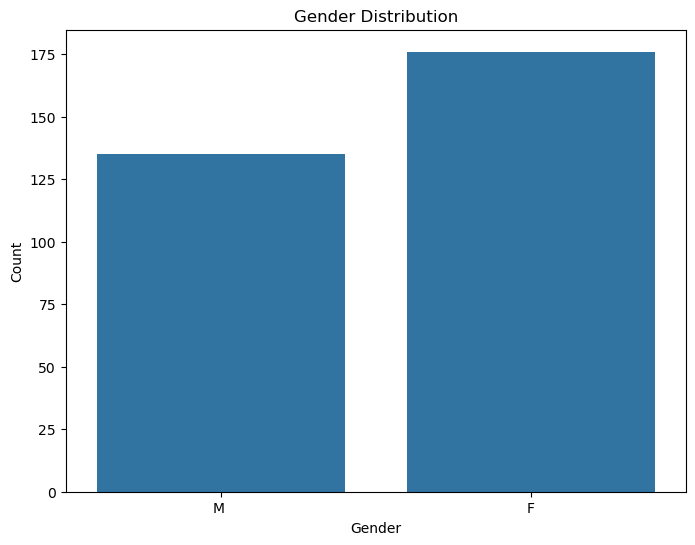

In [24]:
# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=a, x='Sex')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

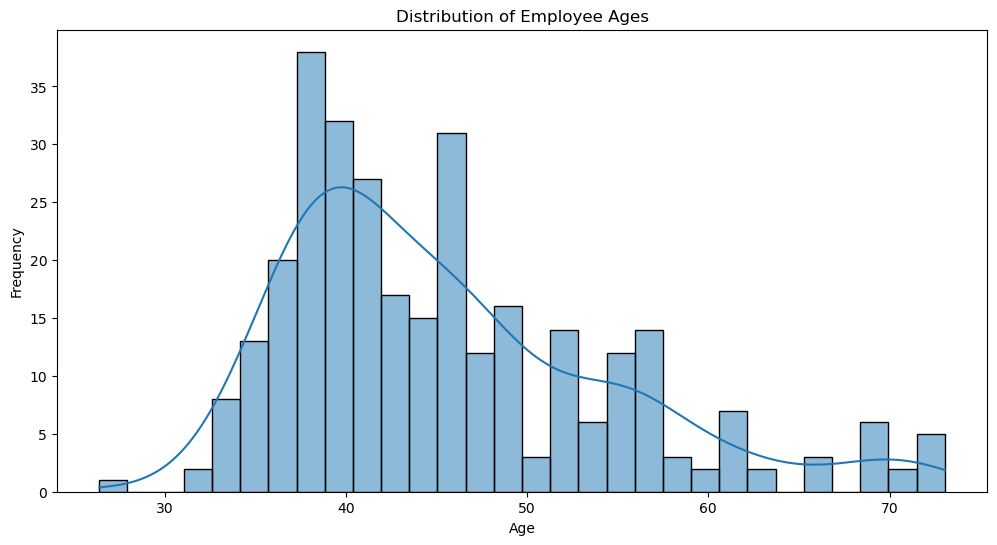

In [25]:
# Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(a['Age'], bins=30, kde=True)
plt.title('Distribution of Employee Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

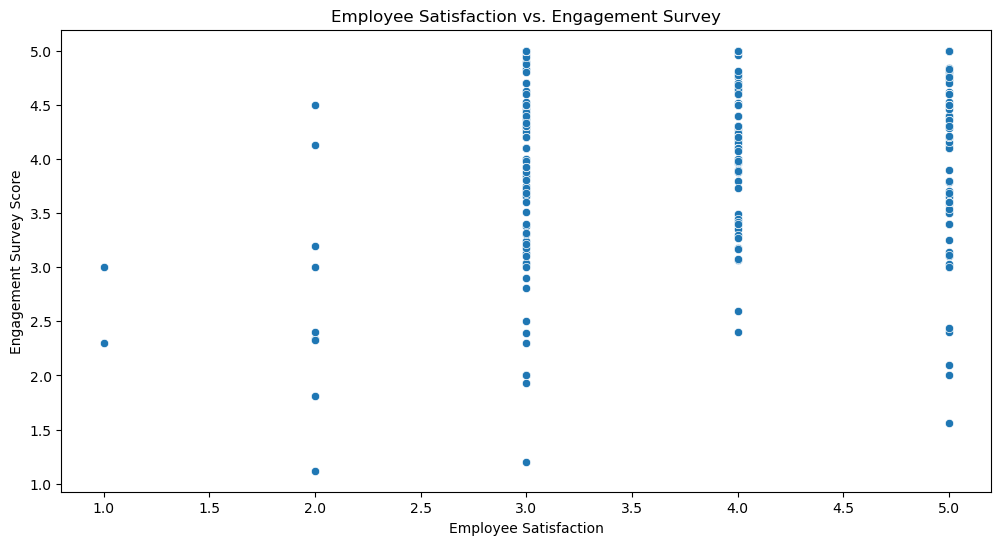

In [26]:
# Employee Satisfaction VS Engagement
plt.figure(figsize=(12, 6))
sns.scatterplot(data=a, x='EmpSatisfaction', y='EngagementSurvey')
plt.title('Employee Satisfaction vs. Engagement Survey')
plt.xlabel('Employee Satisfaction')
plt.ylabel('Engagement Survey Score')
plt.show()

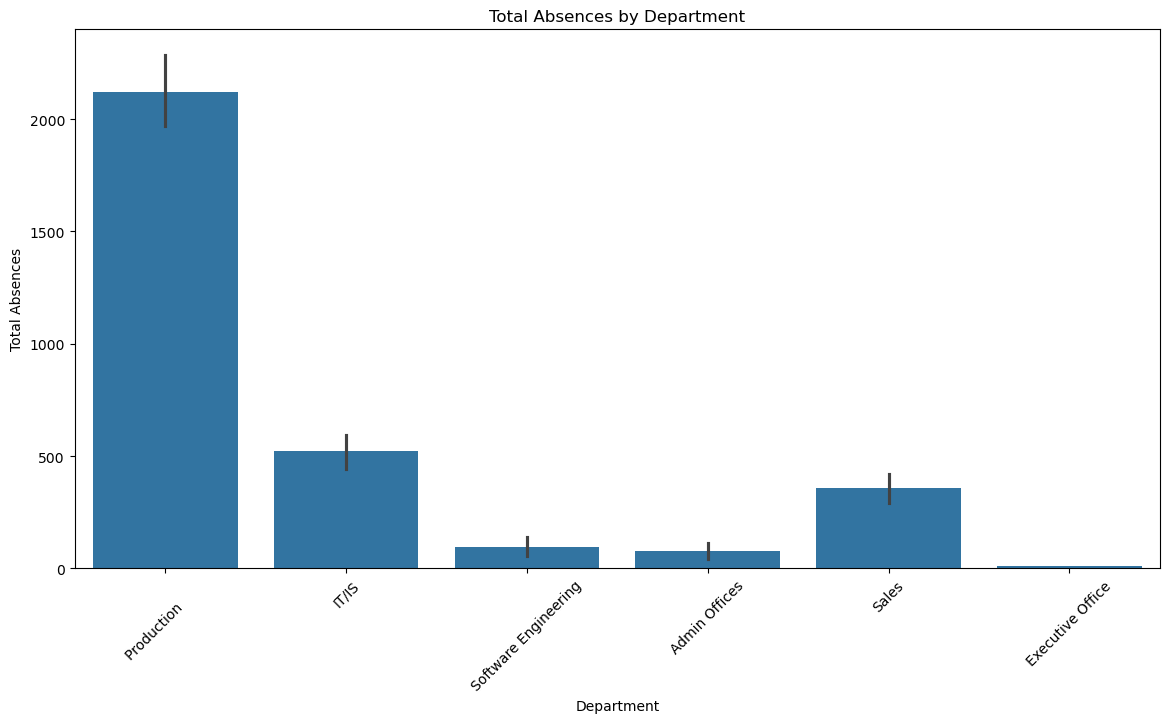

In [27]:
# Absences By Department
plt.figure(figsize=(14, 7))
sns.barplot(data=a, x='Department', y='Absences', estimator='sum')
plt.title('Total Absences by Department')
plt.xlabel('Department')
plt.ylabel('Total Absences')
plt.xticks(rotation=45)
plt.show()

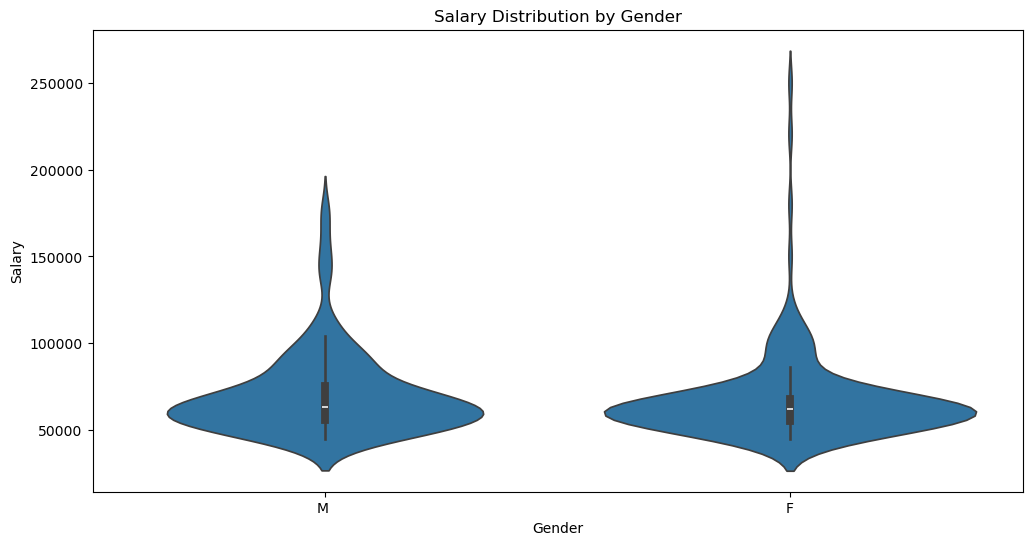

In [28]:
# Salart Distribution By Gender
plt.figure(figsize=(12, 6))
sns.violinplot(data=a, x='Sex', y='Salary')
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

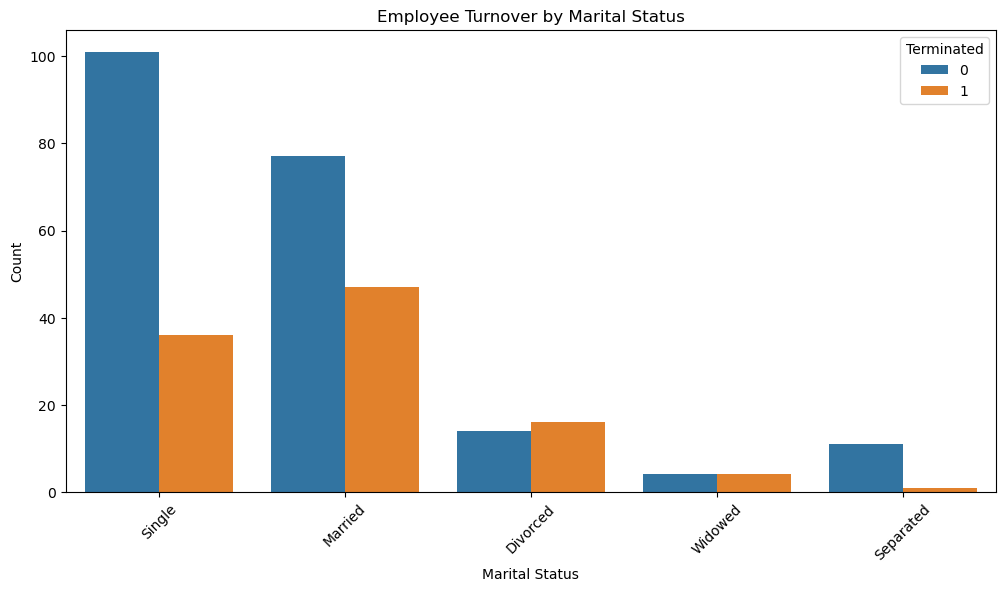

In [29]:
# Employee Turnover By Marital Status
plt.figure(figsize=(12, 6))
sns.countplot(data=a, x='MaritalDesc', hue='Termd')
plt.title('Employee Turnover by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Terminated')
plt.xticks(rotation=45)
plt.show()

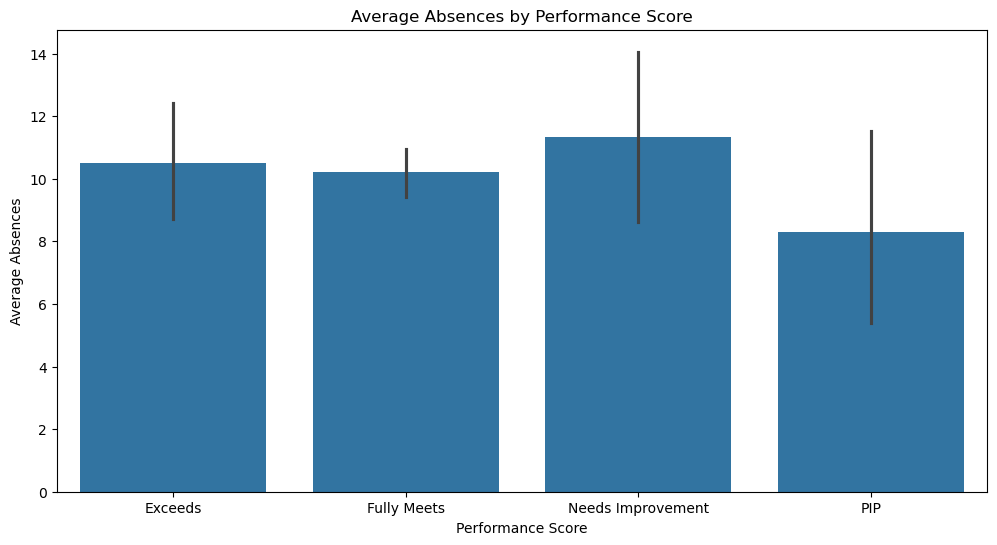

In [30]:
# Average Absences By Performance Score
plt.figure(figsize=(12, 6))
sns.barplot(data=a, x='PerformanceScore', y='Absences', estimator='mean')
plt.title('Average Absences by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Average Absences')
plt.show()

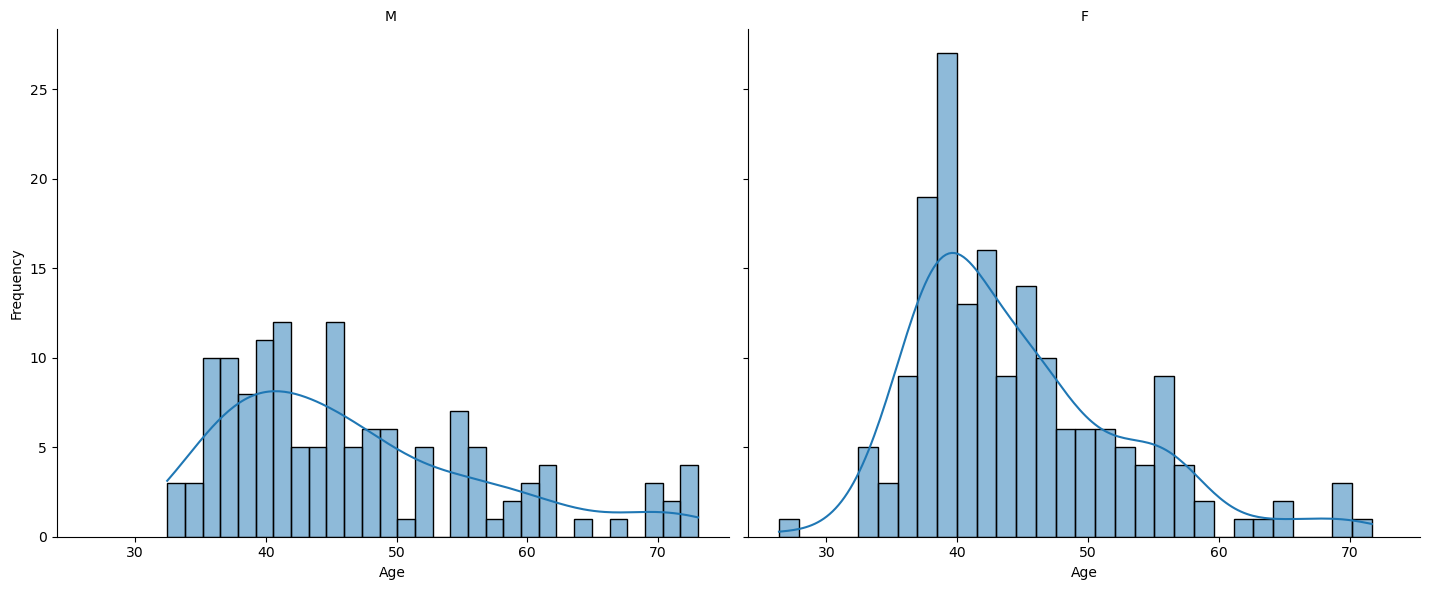

In [31]:
# Average Distribution By Gender
g = sns.FacetGrid(a, col='Sex', height=6, aspect=1.2)
g.map(sns.histplot, 'Age', bins=30, kde=True)
g.set_axis_labels('Age', 'Frequency')
g.set_titles(col_template='{col_name}')
plt.show()

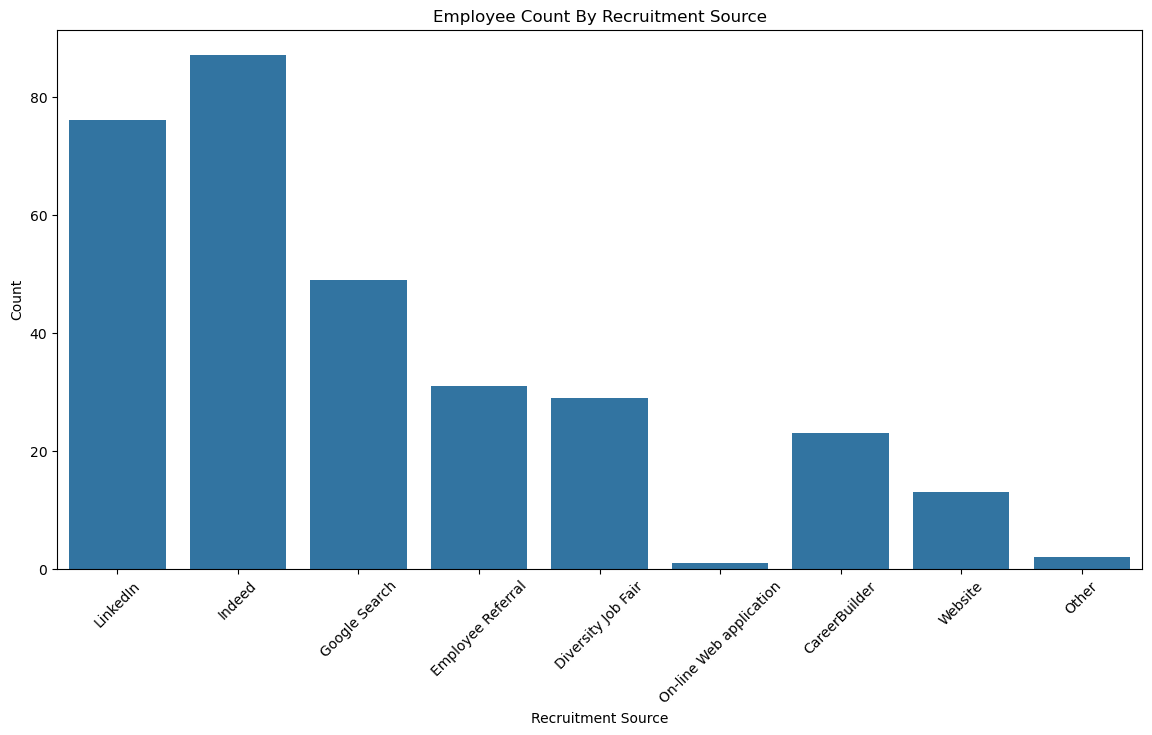

In [66]:
# Employee Count By Recruitment Source
plt.figure(figsize=(14,7))
sns.countplot(data=a,x='RecruitmentSource')
plt.title('Employee Count By Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()